In [1]:
!pip install selenium #Keep also if working from local
!apt-get update #Comment this row if working from local
!apt install chromium-chromedriver #Comment this row if working from local (but the Chrome Driver should be manually installed)
!cp /usr/lib/chromium-browser/chromedriver /usr/bin #Comment this row if working from local
!pip install azure-storage-blob==2.1.0
!apt-get install unixodbc-dev
!pip install pyodbc

     |████████████████████████████████| 911kB 2.9MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security

In [2]:
%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17

OK
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Get:2 https://packages.microsoft.com/ubuntu/16.04/prod xenial InRelease [4,002 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://packages.microsoft.com/ubuntu/16.04/prod xenial/main amd64 Packages [177 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.n

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key output should not be parsed (stdout is not a terminal)
100   983  100   983    0     0   9830      0 --:--:-- --:--:-- --:--:--  9929
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    79  100    79    0     0   1144      0 --:--:-- --:--:-- --:--:--  1144
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling

In [3]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import datetime as dt
from datetime import timedelta as td
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import warnings
from azure.storage.blob import BlockBlobService
from azure.storage.blob import ContentSettings
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")
from datetime import datetime
import pytz
import pyodbc
import re

In [4]:
#db Azure variables
server = 'betsinsights.database.windows.net'
database = 'BETS' 
username = 'admin' 
password = 'xxx' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

Find ID_MATCH

In [5]:
  match = pd.read_sql("""select id_match,match,date_match,t1.team,t2.team
  from dbo.DIM_Match m
  inner join DIM_Teams t1
   on m.id_team_1 = t1.id_team
  inner join DIM_Teams t2
   on m.id_team_2 = t2.id_team""", con = cnxn)
  match

,id_match,match,date_match,team,team
0,00000300001320200817,INTER-SHAKHTAR,20200817,INTER,SHAKHTAR
1,00000400000520200812,ATALANTA-PARIS-SAINT-GERMAN,20200812,ATALANTA,PARIS-SAINT-GERMAN
2,00000500000120200823,PARIS-SAINT-GERMAN-BAYERN,20200823,PARIS-SAINT-GERMAN,BAYERN
3,00000600000120200814,BARCELLONA-BAYERN,20200814,BARCELLONA,BAYERN
4,00000800000920200811,CHONGQING LIFAN-QINGDAO HUANGHAI FC,20200811,CHONGQING LIFAN,QINGDAO HUANGHAI FC
5,00001000001120200816,FALKENBERGS-AIK,20200816,FALKENBERGS,AIK
6,00001300002120200811,SHAKHTAR-FC BASEL,20200811,SHAKHTAR,FC BASEL
7,00001600002920200815,MANCHESTER CITY-LIONE,20200815,MANCHESTER CITY,LIONE
8,00002200002320200812,SHANGHAI EAST ASIA-WUHAN ZALL,20200812,SHANGHAI EAST ASIA,WUHAN ZALL
9,00002400002520200816,SIVIGLIA-MACHESTER UNITED,20200816,SIVIGLIA,MACHESTER UNITED


Read the view

In [71]:
valid_match = pd.read_sql("""
            SELECT id_match,max(info_match) as match,max(date_match) as data, max(score) as score,  count(*) as righe
            FROM dbo.VW_BETS_RECONC
            group by id_match
            order by data desc
            """, con = cnxn)
 
valid_match

,id_match,match,data,score,righe
0,00010200010120200908,Danimarca - Inghilterra,20200908,0-0,90
1,00010700010520200908,Francia-Croazia,20200908,4-2,77
2,00008700008420200907,RepubblicaCeca-Scozia,20200907,1-2,92
3,00007800007620200907,Olanda - Italia,20200907,0-1,91
4,00005800005620200906,Svizzera - Germania,20200906,1-1,87
5,00005700005920200906,Spagna-Ucraina,20200906,4-0,91
6,00006500006620200906,Serbia - Turchia,20200906,0-0,90
7,00010600010720200905,Svezia-Francia,20200905,0-1,90
8,00010400010520200905,Portogallo-Croazia,20200905,4-1,90
9,00010200010320200905,Danimarca-Belgio,20200905,0-2,92


In [118]:
df = pd.read_sql("""
            SELECT *
            FROM dbo.VW_BETS_RECONC
            WHERE id_match = '00007800007620200907'
            order by minute
            """, con = cnxn)

In [119]:
df = df[df["minute"] != 'prematch']
df = df[df["minute"] != 'Finito']
df = df[df["minute"] != 'Intervallo']
df['gol'] = df['score'].str[0:1]+ df['score'].str[2:3]
df['gol'] =df['gol'].astype(int)
#df = df[df["match_quarter"] == '1° tempo']
df.minute.astype(int)
df['under05_hp']=df.minute.astype(int)*(1-df.under05_p.iloc[0])/max(df.minute.astype(int))+df.under05_p.iloc[0]
df['under15_hp']=df.minute.astype(int)*(1-df.under15_p.iloc[0])/max(df.minute.astype(int))+df.under15_p.iloc[0]
df['under25_hp']=df.minute.astype(int)*(1-df.under25_p.iloc[0])/max(df.minute.astype(int))+df.under25_p.iloc[0]
df['under35_hp']=df.minute.astype(int)*(1-df.under35_p.iloc[0])/max(df.minute.astype(int))+df.under35_p.iloc[0]
df['under45_hp']=df.minute.astype(int)*(1-df.under45_p.iloc[0])/max(df.minute.astype(int))+df.under45_p.iloc[0]
pd.set_option('display.max_columns', None)
df.tail(3)

,id_match,date_match,team_1,team_2,info_match,score,timestamp,minute,match_quarter,quota_goal,quota1_p,quotax_p,quota2_p,under05_p,over05_p,under15_p,over15_p,under25_p,over25_p,under35_p,over35_p,under45_p,over45_p,quota1_b,quotax_b,quota2_b,under05_b,over05_b,under15_b,over15_b,under25_b,over25_b,under35_b,over35_b,under45_b,over45_b,amount1x2_cum,amount1x2_cv,amount05_cum,amount05_cv,amount15_cum,amount15_cv,amount25_cum,amount25_cv,amount35_cum,amount35_cv,amount45_cum,amount45_cv,l_1x2_p,l_1x2_b,l_u05_p,l_u05_b,l_u15_p,l_u15_b,l_u25_p,l_u25_b,l_u35_p,l_u35_b,l_u45_p,l_u45_b,comment,team_1_tiri_match_cum,team_1_tiri_match,team_2_tiri_match_cum,team_2_tiri_match,team_1_tiri_t1_cum,team_1_tiri_t1,team_2_tiri_t1_cum,team_2_tiri_t1,team_1_tiri_t2_cum,team_1_tiri_t2_p,team_2_tiri_t2_cum,team_2_tiri_t2,team_1_cart_g_match_cum,team_1_cart_g_match,team_2_cart_g_match_cum,team_2_cart_g_match,team_1_cart_g_t1_cum,team_1_cart_g_t1,team_2_cart_g_t1_cum,team_2_cart_g_t1,team_1_cart_g_t2_cum,team_1_cart_g_t2,team_2_cart_g_t2_cum,team_2_cart_g_t2_p,team_1_tiri_in_porta_match_cum,team_1_tiri_in_porta_match,team_2_tiri_in_porta_match_cum,team_2_tiri_in_porta_match,team_1_tiri_in_porta_t1_cum,team_1_tiri_in_porta_t1,team_2_tiri_in_porta_t1_cum,team_2_tiri_in_porta_t1,team_1_tiri_in_porta_t2_cum,team_1_tiri_in_porta_t2,team_2_tiri_in_porta_t2_cum,team_2_tiri_in_porta_t2,team_1_falli_match_cum,team_1_falli_match,team_2_falli_match_cum,team_2_falli_match,team_1_falli_t1_cum,team_1_falli_t1,team_2_falli_t1_cum,team_2_falli_t1,team_1_falli_t2_cum,team_1_falli_t2,team_2_falli_t2_cum,team_2_falli_t2,team_1_tiri_fermati_match_cum,team_1_tiri_fermati_match,team_2_tiri_fermati_match_cum,team_2_tiri_fermati_match,team_1_tiri_fermati_t1_cum,team_1_tiri_fermati_t1,team_2_tiri_fermati_t1_cum,team_2_tiri_fermati_t1,team_1_tiri_fermati_t2_cum,team_1_tiri_fermati_t2,team_2_tiri_fermati_t2_cum,team_2_tiri_fermati_t2,team_1_rimesse_laterali_match_cum,team_1_rimesse_laterali_match,team_2_rimesse_laterali_match_cum,team_2_rimesse_laterali_match,team_1_rimesse_laterali_t1_cum,team_1_rimesse_laterali_t1,team_2_rimesse_laterali_t1_cum,team_2_rimesse_laterali_t1,team_1_rimesse_laterali_t2_cum,team_1_rimesse_laterali_t2,team_2_rimesse_laterali_t2_cum,team_2_rimesse_laterali_t2,team_1_tiri_fuori_match_cum,team_1_tiri_fuori_match,team_2_tiri_fuori_match_cum,team_2_tiri_fuori_match,team_1_tiri_fuori_t1_cum,team_1_tiri_fuori_t1,team_2_tiri_fuori_t1_cum,team_2_tiri_fuori_t1,team_1_tiri_fuori_t2_cum,team_1_tiri_fuori_t2,team_2_tiri_fuori_t2_cum,team_2_tiri_fuori_t2,team_1_fuorigioco_match_cum,team_1_fuorigioco_match,team_2_fuorigioco_match_cum,team_2_fuorigioco_match,team_1_fuorigioco_t1_cum,team_1_fuorigioco_t1,team_2_fuorigioco_t1_cum,team_2_fuorigioco_t1,team_1_fuorigioco_t2_cum,team_1_fuorigioco_t2,team_2_fuorigioco_t2_cum,team_2_fuorigioco_t2,team_1_attacchi_match_cum,team_1_attacchi_match,team_2_attacchi_match_cum,team_2_attacchi_match,team_1_attacchi_t1_cum,team_1_attacchi_t1,team_2_attacchi_t1_cum,team_2_attacchi_t1,team_1_attacchi_t2_cum,team_1_attacchi_t2,team_2_attacchi_t2_cum,team_2_attacchi_t2,team_1_parate_match_cum,team_1_parate_match,team_2_parate_match_cum,team_2_parate_match,team_1_parate_t1_cum,team_1_parate_t1,team_2_parate_t1_cum,team_2_parate_t1,team_1_parate_t2_cum,team_1_parate_t2,team_2_parate_t2_cum,team_2_parate_t2,team_1_punizioni_match_cum,team_1_punizioni_match,team_2_punizioni_match_cum,team_2_punizioni_match,team_1_punizioni_t1_cum,team_1_punizioni_t1,team_2_punizioni_t1_cum,team_2_punizioni_t1,team_1_punizioni_t2_cum,team_1_punizioni_t2,team_2_punizioni_t2_cum,team_2_punizioni_t2,team_1_att_pericolosi_match_cum,team_1_att_pericolosi_match,team_2_att_pericolosi_match_cum,team_2_att_pericolosi_match,team_1_att_pericolosi_t1_cum,team_1_att_pericolosi_t1,team_2_att_pericolosi_t1_cum,team_2_att_pericolosi_t1,team_1_att_pericolosi_t2_cum,team_1_att_pericolosi_t2,team_2_att_pericolosi_t2_cum,team_2_att_pericolosi_t2,team_1_poss_palla_match_cum,te

**ANALISI**

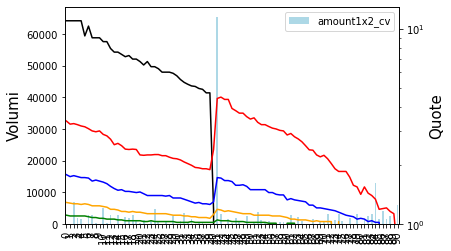

91


In [120]:
#UNDER E VOLUMI
ax = df[['amount1x2_cv']].plot(kind='bar', use_index=True,color='lightblue')
ax2 = ax.twinx()
ax2.plot(df[['under05_p']].values, linestyle='-', linewidth=1.5,color='black')
ax2.plot(df[['under15_p']].values, linestyle='-', linewidth=1.5,color='red')
ax2.plot(df[['under25_p']].values, linestyle='-', linewidth=1.5,color='blue')
ax2.plot(df[['under35_p']].values, linestyle='-', linewidth=1.5,color='orange')
ax2.plot(df[['under45_p']].values, linestyle='-', linewidth=1.5,color='green')
ax2.set_yscale("log")
 
ax2.set_ylim(1, max(df.under05_p)+2)
ax.set_ylabel("Volumi", fontsize=15, color="black")
ax2.set_ylabel("Quote", fontsize=15, color="black")
 
plt.show()
print(len(df.amount1x2_cv))

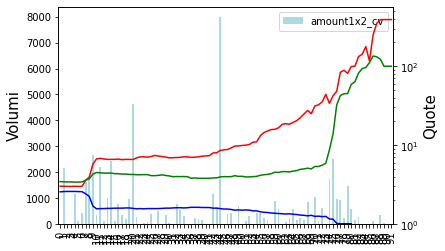

92


In [93]:
#1X2 E VOLUMI
ax = df[['amount1x2_cv']].plot(kind='bar', use_index=True,color='lightblue')
ax2 = ax.twinx()
ax2.plot(df[['quota1_p']].values, linestyle='-', linewidth=1.5,color='red')
ax2.plot(df[['quotax_p']].values, linestyle='-', linewidth=1.5,color='green')
ax2.plot(df[['quota2_p']].values, linestyle='-', linewidth=1.5,color='blue')
ax2.set_yscale("log")
 
ax2.set_ylim(1,)
ax.set_ylabel("Volumi", fontsize=15, color="black")
ax2.set_ylabel("Quote", fontsize=15, color="black")
 
plt.show()
print(len(df.amount1x2_cv))

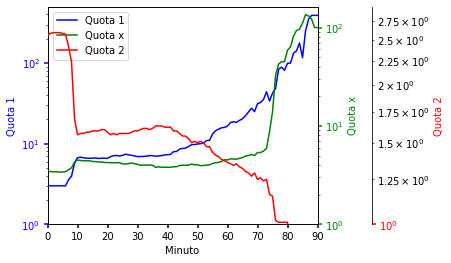

In [97]:
#1X2
import matplotlib.pyplot as plt
 
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
 
fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)
 
par1 = host.twinx()
par2 = host.twinx()
 
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
 
p1, = host.plot(df.quota1_p, "b-", label="Quota 1")
p2, = par1.plot(df.quotax_p, "g-", label="Quota x")
p3, = par2.plot(df.quota2_p, "r-", label="Quota 2")
par1.set_yscale("log")
par2.set_yscale("log")
host.set_yscale("log")
 
#host.set_xlim(0, 90)
host.set_ylim(1,)
par1.set_ylim(1,)
par2.set_ylim(1,)
 
host.set_xlabel("Minuto")
host.set_ylabel("Quota 1")
par1.set_ylabel("Quota x")
par2.set_ylabel("Quota 2")
 
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
 
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)
 
lines = [p1, p2, p3]
 
host.legend(lines, [l.get_label() for l in lines])
host.set_xlim(0,90)
host.set_ylim(1,)
par1.set_ylim(1,)
par2.set_ylim(1,)
 
plt.show()

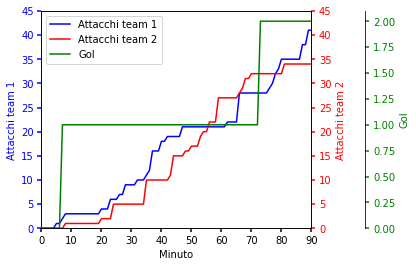

In [100]:
#ATTACCHI PERICOLOSI
import matplotlib.pyplot as plt

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(df.team_1_att_pericolosi_match_cum, "b-", label="Attacchi team 1")
p2, = par1.plot(df.team_2_att_pericolosi_match_cum, "r-", label="Attacchi team 2")
p3, = par2.plot(df.gol, "g-", label="Gol")

host.set_xlabel("Minuto")
host.set_ylabel("Attacchi team 1")
par1.set_ylabel("Attacchi team 2")
par2.set_ylabel("Gol")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

host.set_xlim(0, 90)
host.set_ylim(0,45)
par1.set_ylim(0,45)
par2.set_ylim(0,)

a=plt.show()

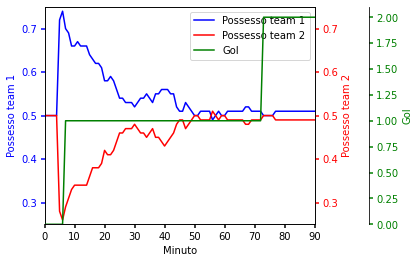

In [101]:
#POSSESSO PALLA
import matplotlib.pyplot as plt

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(df.team_1_poss_palla_match_cum, "b-", label="Possesso team 1")
p2, = par1.plot(df.team_2_poss_palla_match_cum, "r-", label="Possesso team 2")
p3, = par2.plot(df.gol, "g-", label="Gol")

host.set_xlabel("Minuto")
host.set_ylabel("Possesso team 1")
par1.set_ylabel("Possesso team 2")
par2.set_ylabel("Gol")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])


host.set_xlim(0, 90)
host.set_ylim(0.25,0.75)
par1.set_ylim(0.25,0.75)
par2.set_ylim(0,)

plt.show()

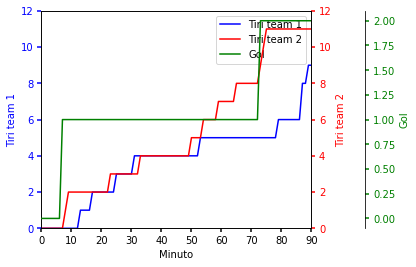

In [102]:
#TIRI
import matplotlib.pyplot as plt

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(df.team_1_tiri_match_cum, "b-", label="Tiri team 1")
p2, = par1.plot(df.team_2_tiri_match_cum, "r-", label="Tiri team 2")
p3, = par2.plot(df.gol, "g-", label="Gol")

host.set_xlabel("Minuto")
host.set_ylabel("Tiri team 1")
par1.set_ylabel("Tiri team 2")
par2.set_ylabel("Gol")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])


host.set_xlim(0, 90)
host.set_ylim(0,12)
par1.set_ylim(0,12)
#par2.set_ylim(0,)

plt.show()